# Ejercicio Aplicando PCA: Principal Component Analysis

### Importamos librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Cargamos datos de entrada

In [3]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")



### Visualicemos las dimensiones

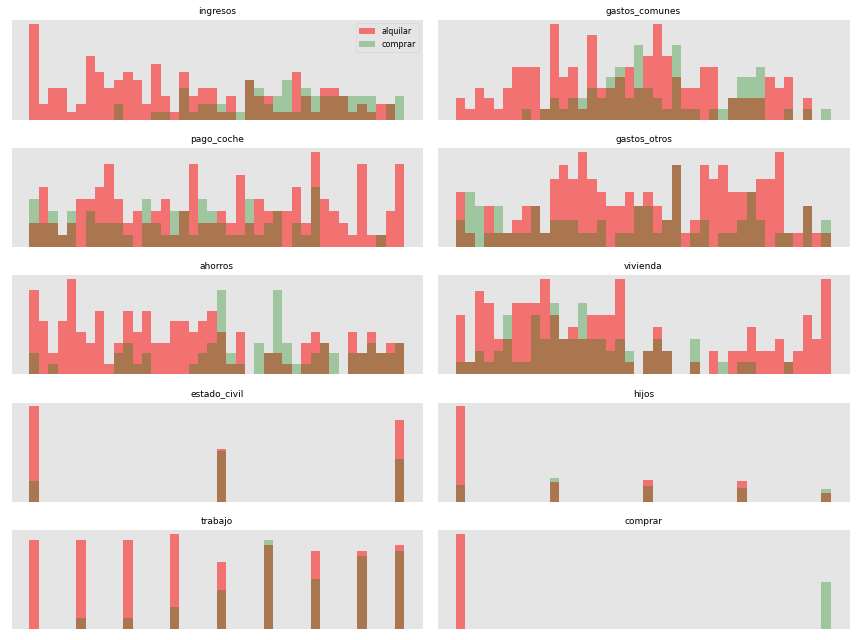

In [3]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de como se correlacionan

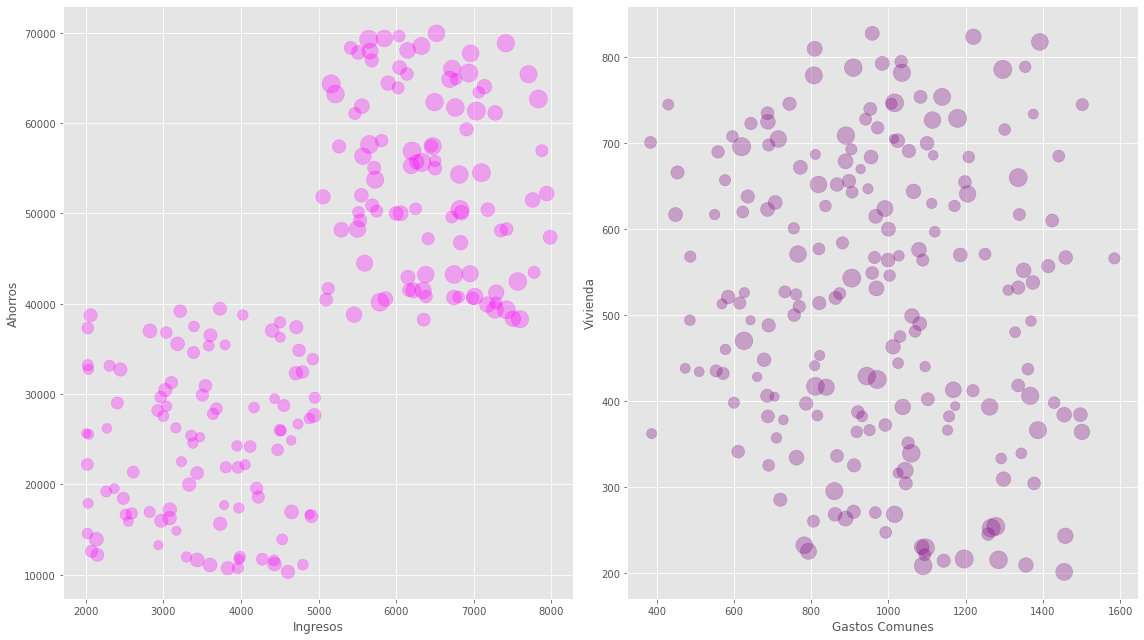

In [4]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

## Vamos a Normalizar ó Estandalizar los datos

## Aplicamos PCA

### Veamos cuán buenos predictores son las nuevas dimensiones

### graficamos la variacion explicada acumulada

### Veamos la correlacion entre las nuevas componentes y las dimensiones originales

In [6]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

"\nplt.matshow(pca.components_[0:5],cmap='viridis')\nplt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)\nplt.colorbar()\nplt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')\nplt.tight_layout()\nplt.show()# \n"

## Preparo nuevas entradas para validar el algoritmo

In [7]:
# Split dataset in training and test datasets
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["comprar"]=dataframe["comprar"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

## Prediccion con KNN

### Con datos de entrada con reducción de dimensiones por PCA

## Resultados Obtenidos